<a href="https://www.kaggle.com/code/mahendrasinghrajpoot/fraud-detection-ml?scriptVersionId=96390612" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

> >  > We will going to create the notebook which will show us how to use the *machine learning* techniques on the banking dataset and find out the **fraud detection methods** , with the help of *logistic model*.

> > We will be using the banking dataset and building the model aroung it.

> **Exploratory Data Analysis in Python**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#loading the dataset into the environment
data1 = pd.read_csv("../input/creditcardfraud/creditcard.csv")
#finding the head of the dataset
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data1.shape #finding the shape of the dataset

(284807, 31)

In [4]:
print(data1.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [5]:
data1.dtypes #finding out the types of the different features and input in our dataset

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
#finding out the number of missing values in the dataset
data1.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [7]:
data1.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [8]:
#finding out the duplicate values in the dataset
data1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

<AxesSubplot:>

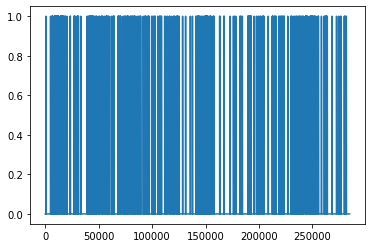

In [9]:
#plotting the label of the dataset
data1.Class.plot(kind='line') #it kind of provides us the idea that how the data is classified in our dataset

In [10]:
data1.isna() #finding out the missing values in the dataset
#as we can see there are no missing values in the dataeset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data1.isna().sum()#this is the more good form of the above function

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# **Class imbalance problem**

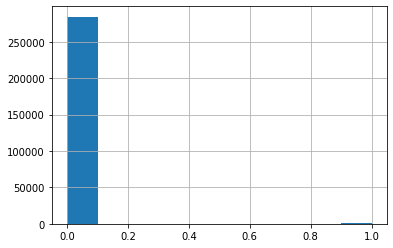

In [12]:
#lets vizualize some more of the dataset
data1.Class.hist()
plt.show()
#as we can see there is very few number of people who are classified as fraud by the system
#this can also be seen as the class imbalance problem
#going ahead we need to use the SMOTE methods to overcome this problem

In [13]:
corr = data1.corr()
corr.style.background_gradient(cmap='coolwarm')
#as we can see that there is no large correlation present in the dataset , that we need to be taken care off.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


In [14]:
#it is showing the zero values because there are many values which are negatively correalted to each other 
cor_matrix = data1.corr().abs()
print(cor_matrix.head())

          Time            V1            V2            V3            V4  \
Time  1.000000  1.173963e-01  1.059333e-02  4.196182e-01  1.052602e-01   
V1    0.117396  1.000000e+00  4.135835e-16  1.227819e-15  9.215150e-16   
V2    0.010593  4.135835e-16  1.000000e+00  3.243764e-16  1.121065e-15   
V3    0.419618  1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4    0.105260  9.215150e-16  1.121065e-15  4.711293e-16  1.000000e+00   

                V5            V6            V7            V8            V9  \
Time  1.730721e-01  6.301647e-02  8.471437e-02  3.694943e-02  8.660434e-03   
V1    1.812612e-17  6.506567e-16  1.005191e-15  2.433822e-16  1.513678e-16   
V2    5.157519e-16  2.787346e-16  2.055934e-16  5.377041e-17  1.978488e-17   
V3    6.539009e-17  1.627627e-15  4.895305e-16  1.268779e-15  5.568367e-16   
V4    1.719944e-15  7.491959e-16  4.104503e-16  5.697192e-16  6.923247e-16   

      ...           V21           V22           V23           V24  \
Time  ...  4.4735

In [15]:
#we will be calcualting the correlations matrix with different correlation coefficients,
#spearman is calculated for the monotonic dataset, not for the linear dataset
Spearman_1 = data1.corr(method="spearman")
print(Spearman_1.head())

          Time        V1        V2        V3        V4        V5        V6  \
Time  1.000000  0.190647 -0.006419 -0.473348 -0.142156  0.226004 -0.111408   
V1    0.190647  1.000000 -0.384328 -0.412095  0.101011 -0.106632 -0.086561   
V2   -0.006419 -0.384328  1.000000  0.073967  0.155042  0.342701 -0.110393   
V3   -0.473348 -0.412095  0.073967  1.000000  0.060812 -0.223849  0.171263   
V4   -0.142156  0.101011  0.155042  0.060812  1.000000  0.021367  0.075185   

            V7        V8        V9  ...       V21       V22       V23  \
Time  0.116722 -0.103882  0.017986  ...  0.096564  0.132651  0.148505   
V1   -0.227650 -0.236140  0.138614  ... -0.061958 -0.028827  0.145440   
V2    0.426320  0.006980 -0.077880  ... -0.098255 -0.056478 -0.094982   
V3   -0.074582  0.164374 -0.030876  ... -0.040234  0.004404 -0.140076   
V4    0.059920 -0.009608  0.105248  ...  0.038960 -0.004931  0.009615   

           V24       V25       V26       V27       V28    Amount     Class  
Time -0.015980 

In [16]:
#so the good thing about it is that, the dataset contains the Numerically encoded variables V1 to V28 which are the principal components obtained from a PCA transformation. 
#Due to confidentiality issues, no background information about the original features was provided.

In [17]:
#lets find the number of frauds in our dataset
data1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
#Let's calculate the percentage of fraudulent transactions over the total number of 
#transactions in our dataset
(data1['Class'].value_counts()*100/len(data1)).convert_dtypes()
#as we can see the percentage of fruadulent transaction in dataset is less than 1/2%

0    99.827251
1     0.172749
Name: Class, dtype: Float64

In [19]:
#next we will going to plot the dataset